In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
x=df.iloc[:,0:4]
y=df.iloc[:,4:5]
print(x,y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]        species
0       setosa
1       setosa
2       setosa
3       setosa
4       setosa
..         ...
145  virginica
146  virginica
147  virginica
148  virginica
149  virginica

[150 rows x 1 columns]


# Split Train and Test

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=101)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(105, 4) (105, 1) (45, 4) (45, 1)


# import model and fit

In [5]:
from sklearn.tree import DecisionTreeClassifier
DTK=DecisionTreeClassifier()
DTK.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Predictions

In [6]:
y_pred=DTK.predict(x_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor'], dtype=object)

# Accuracy

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


0.9555555555555556


In [13]:
import sklearn
sklearn.__version__

'0.22.1'

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


[Text(357.12, 440.31600000000003, 'X[3] <= 0.75\ngini = 0.663\nsamples = 105\nvalue = [37, 30, 38]'),
 Text(267.84000000000003, 342.468, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(446.4, 342.468, 'X[3] <= 1.65\ngini = 0.493\nsamples = 68\nvalue = [0, 30, 38]'),
 Text(178.56, 244.62, 'X[2] <= 4.95\ngini = 0.121\nsamples = 31\nvalue = [0, 29, 2]'),
 Text(89.28, 146.772, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(267.84000000000003, 146.772, 'X[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(178.56, 48.924000000000035, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(357.12, 48.924000000000035, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(714.24, 244.62, 'X[2] <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(624.96, 146.772, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(535.6800000000001, 48.924000000000035, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(714.24, 48.924000000000035, 'gini = 0.

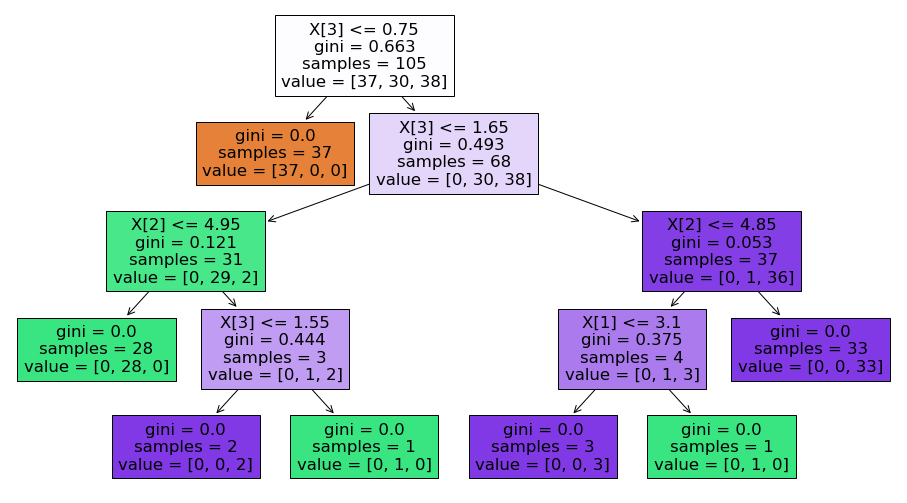

In [16]:
from sklearn import tree
plt.figure(figsize=(16,9))
tree.plot_tree(DTK,filled=True)